In [1]:
import torch
from torchvision import models, datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [2]:
model = models.resnet18(pretrained=True);
model.fc = nn.Linear(model.fc.in_features, 2);

In [9]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([transforms.CenterCrop(244), transforms.RandomHorizontalFlip(), transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

train_dataset = datasets.ImageFolder('././data/cats_dogs/training_set/', transform=transform)
test_dataset = datasets.ImageFolder('./data/cats_dogs/test_set/', transform=transform)


In [10]:

batch_size = 4

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=False, batch_size=batch_size)

In [11]:
example = iter(train_dataloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


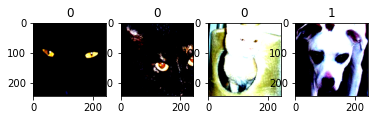

In [12]:
examples = next(example)
samples, labels = examples
samples_length = len(samples)
for i in range(samples_length):
    img = samples[i]
    img = np.transpose(img, (1, 2, 0))
    plt.subplot(1, samples_length, i + 1)
    plt.title(labels[i].item())
    plt.imshow(img)
plt.show()

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = model.to(device=device)

In [14]:
optim = torch.optim.SGD(model.parameters(), lr=1e-5, weight_decay=.001)
criterion = nn.CrossEntropyLoss()
total_epoths = 2
optim.zero_grad()


def train(net, opt, criterion, dataloader, num_epoths: int):
    for epoth in range(num_epoths):
        total_loss = 0
        for i, (features, labels) in enumerate(dataloader):
            features = features.to(device)
            labels = labels.to(device)

            outputs = net(features)
            loss = criterion(labels, outputs)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()
        print(f'epoth: {epoth}:{num_epoths}  total loss: {total_loss}')

In [15]:
train(model, optim, criterion, train_dataloader, total_epoths)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)